In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [8]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
                 batch_size=128,
                 epochs=50,
                 verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 20us/step - loss: 1.2846 - acc: 0.6819 - val_loss: 0.6861 - val_acc: 0.8482
Epoch 2/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.5820 - acc: 0.8584 - val_loss: 0.4712 - val_acc: 0.8861
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.4553 - acc: 0.8813 - val_loss: 0.4002 - val_acc: 0.8976
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.4006 - acc: 0.8920 - val_loss: 0.3608 - val_acc: 0.9061
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.3683 - acc: 0.8992 - val_loss: 0.3366 - val_acc: 0.9108
Epoch 6/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.3462 - acc: 0.9043 - val_loss: 0.3189 - val_acc: 0.9147
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.3294 - acc: 0.9083 - val_loss: 0.3056 - val_acc

In [9]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

10000/10000 [==============================] - 0s 25us/step


In [10]:
print('loss_and_metrics : ' + str(loss_and_metrics))

loss_and_metrics : [0.15169729749560357, 0.9572]


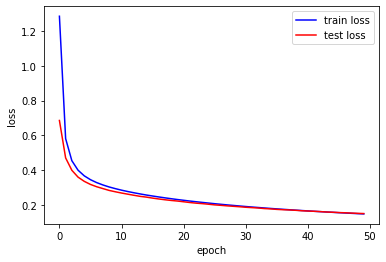

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

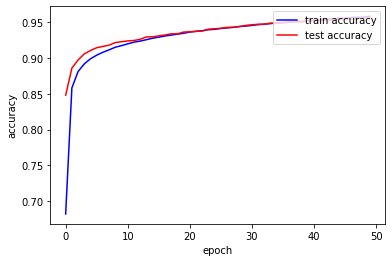

In [12]:
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['acc'], 'b', label='train accuracy')
loss_ax.plot(hist.history['val_acc'], 'r', label='test accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper right')

plt.show()

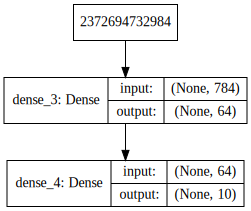

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))